<a href="https://colab.research.google.com/github/raguram/eva/blob/master/Q9/CIFAR10_Quiz9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from datetime import datetime 
import pytz

tz = pytz.timezone('Asia/Kolkata')
print("Current Date/Time: ", datetime.now().astimezone(tz))

Current Date/Time:  2020-03-21 22:02:45.127208+05:30


## Mount the drive and load required modules

In [40]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

LIBRARY_ROOT = "/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/"

from importlib.machinery import SourceFileLoader

SourceFileLoader('Utility', join(LIBRARY_ROOT, 'Utility.py')).load_module()
SourceFileLoader('DataUtility', join(LIBRARY_ROOT, 'DataUtility.py')).load_module()
SourceFileLoader('CIFAR10Net', join(LIBRARY_ROOT, 'CIFAR10Net.py')).load_module()
SourceFileLoader('MetricsUtility', join(LIBRARY_ROOT, 'MetricsUtility.py')).load_module()
SourceFileLoader('ModelBuilder', join(LIBRARY_ROOT, 'ModelBuilder.py')).load_module()
SourceFileLoader('LossFunctionUtility', join(LIBRARY_ROOT, 'LossFunctionUtility.py')).load_module()
SourceFileLoader('Quiz9Model', join(LIBRARY_ROOT, 'Quiz9Model.py')).load_module()

print("Loaded the required modules")

Mounted at /content/drive
Loaded the required modules


In [0]:
from torchvision import datasets, transforms
from ModelBuilder import ModelTester
import torch
import Utility 
import DataUtility
import MetricsUtility
import ModelBuilder
from LossFunctionUtility import LossFn
import torch.nn.functional as F
import torch.optim as optim
from ModelBuilder import ModelBuilder
import torch.nn as nn
from albumentations import Compose, HorizontalFlip, Normalize
from albumentations.pytorch import ToTensor
import numpy as np
from DataUtility import Alb
from Quiz9Model import Quiz9_CIFAR10

### Load the data and perform required transformations

Files already downloaded and verified
Files already downloaded and verified
Shape of a train data batch: torch.Size([128, 3, 32, 32])
Shape of a test data batch: torch.Size([128, 3, 32, 32])
Number of train images: 50000
Number of test images: 10000


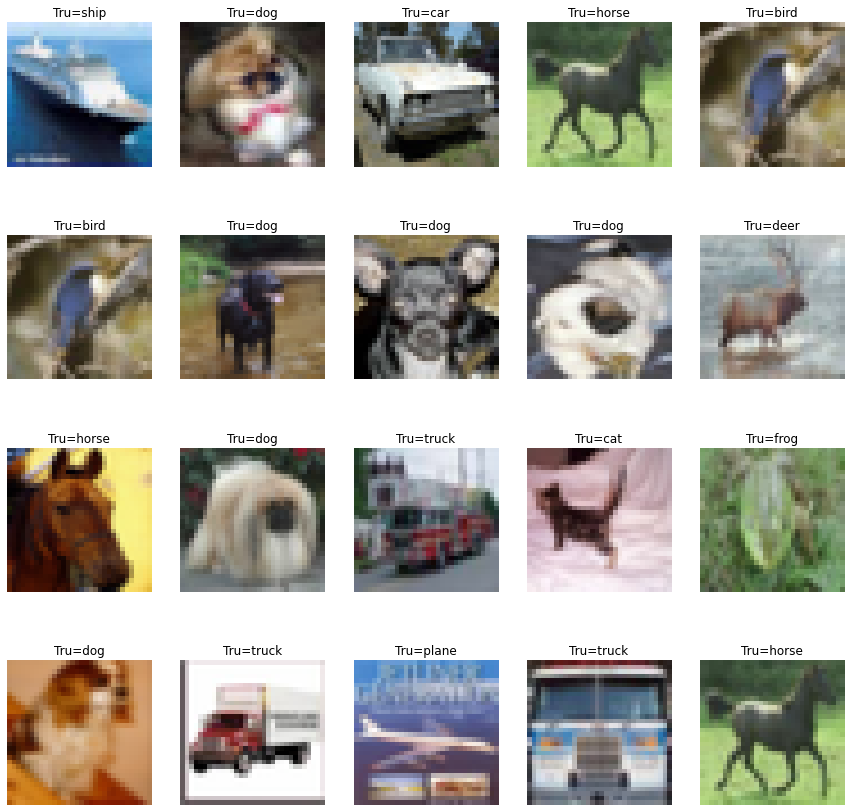

In [42]:
train_transforms = Compose([
        HorizontalFlip(),
        Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ToTensor()
        ])
  
test_transforms = Compose([
          Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
          ToTensor()
          ])

data=DataUtility.download_CIFAR10(Alb(train_transforms), Alb(test_transforms))
DataUtility.showLoaderImages(data.train, count=20, classes=data.classes, muSigmaPair=((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)))

## Initialize the network and view the summary

In [44]:
from torchsummary import summary
summary(Quiz9_CIFAR10().to(Utility.getDevice()), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
            Conv2d-2           [-1, 32, 32, 32]             864
              ReLU-3           [-1, 32, 32, 32]               0
       BatchNorm2d-4           [-1, 32, 32, 32]              64
         Dropout2d-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 32, 30, 30]           9,216
        InputBlock-7           [-1, 32, 30, 30]               0
              ReLU-8           [-1, 32, 30, 30]               0
       BatchNorm2d-9           [-1, 32, 30, 30]              64
        Dropout2d-10           [-1, 32, 30, 30]               0
        MaxPool2d-11           [-1, 32, 15, 15]               0
  TransitionBlock-12           [-1, 32, 15, 15]               0
           Conv2d-13           [-1, 64, 15, 15]           2,048
           Conv2d-14           [-1, 64,

## Train the network

In [45]:
net = Quiz9_CIFAR10().to(Utility.getDevice())
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
builder = ModelBuilder(net, data, LossFn(nn.CrossEntropyLoss()), optimizer)
result = builder.fit(20)



Epoch: 1



Train Accuracy: 54.5%, Train Loss: 0.009897945448756218



Test Accuracy: 66.92%, Test Loss: 0.007353007327765226


Epoch: 2



Train Accuracy: 69.93%, Train Loss: 0.006697692908346653



Test Accuracy: 75.08%, Test Loss: 0.0056453850120306015


Epoch: 3



Train Accuracy: 75.21%, Train Loss: 0.005603226833045483



Test Accuracy: 78.32%, Test Loss: 0.005174571182578802


Epoch: 4



Train Accuracy: 78.082%, Train Loss: 0.0049750916659832



Test Accuracy: 79.7%, Test Loss: 0.004693390801548958


Epoch: 5



Train Accuracy: 79.954%, Train Loss: 0.004493234679102898



Test Accuracy: 81.33%, Test Loss: 0.004306212067604065


Epoch: 6



Train Accuracy: 81.756%, Train Loss: 0.004078051541000605



Test Accuracy: 82.07%, Test Loss: 0.004139987286180258


Epoch: 7



Train Accuracy: 83.134%, Train Loss: 0.003797847544774413



Test Accuracy: 82.13%, Test Loss: 0.0041292947717010975


Epoch: 8



Train Accuracy: 84.344%, Train Loss: 0.003520927857607603



Test Accuracy: 83.37%, Test Loss: 0.003902783850207925


Epoch: 9



Train Accuracy: 85.11%, Train Loss: 0.0033635429572314024



Test Accuracy: 83.92%, Test Loss: 0.003783481428399682


Epoch: 10



Train Accuracy: 85.93%, Train Loss: 0.0031330427154898643



Test Accuracy: 84.32%, Test Loss: 0.0037244379054754972


Epoch: 11



Train Accuracy: 86.754%, Train Loss: 0.002983464626595378



Test Accuracy: 83.95%, Test Loss: 0.0038036219775676727


Epoch: 12



Train Accuracy: 87.51%, Train Loss: 0.002810168080031872



Test Accuracy: 84.3%, Test Loss: 0.0036481544375419617


Epoch: 13



Train Accuracy: 87.974%, Train Loss: 0.00272183190099895



Test Accuracy: 84.7%, Test Loss: 0.0036452235653996468


Epoch: 14



Train Accuracy: 88.572%, Train Loss: 0.00253698555752635



Test Accuracy: 85.04%, Test Loss: 0.0034756541717797518


Epoch: 15



Train Accuracy: 89.044%, Train Loss: 0.002461124211549759



Test Accuracy: 85.71%, Test Loss: 0.0033976284321397543


Epoch: 16



Train Accuracy: 89.474%, Train Loss: 0.0023483168333768845



Test Accuracy: 85.52%, Test Loss: 0.003459186526015401


Epoch: 17



Train Accuracy: 89.974%, Train Loss: 0.0022475244477391243



Test Accuracy: 85.29%, Test Loss: 0.0035853369627147913


Epoch: 18



Train Accuracy: 90.004%, Train Loss: 0.0021940553560853004



Test Accuracy: 85.33%, Test Loss: 0.003544469363987446


Epoch: 19



Train Accuracy: 90.562%, Train Loss: 0.0020859292708337307



Test Accuracy: 86.11%, Test Loss: 0.0034032592084258795


Epoch: 20



Train Accuracy: 90.996%, Train Loss: 0.001991302939131856



Test Accuracy: 86.2%, Test Loss: 0.0035061591770499945


## Plot metrics and loss

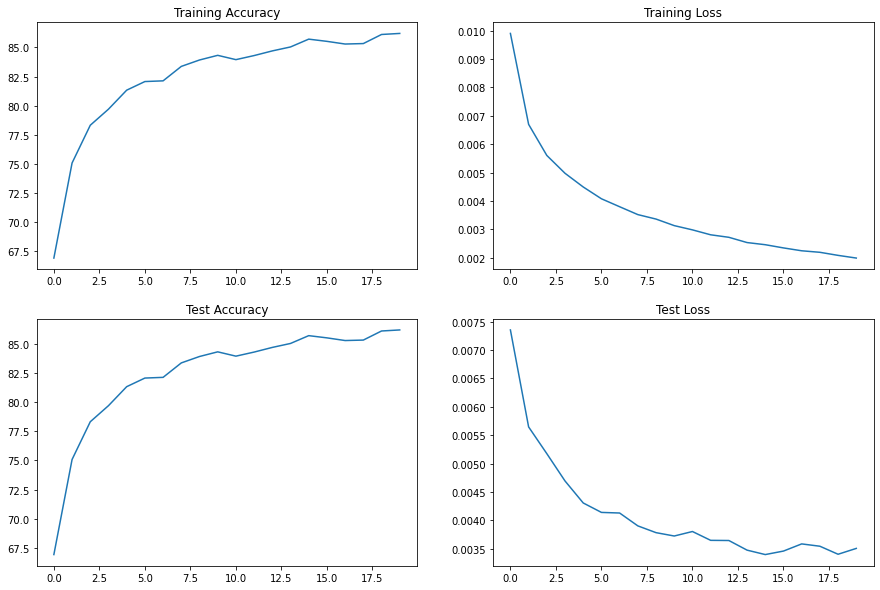

In [46]:
MetricsUtility.plotMetrics(result)